In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from glob import glob


In [25]:
# Ensure dataset path is correct
data_dir = r"C:\Users\Preeti Deora\Desktop\QR_Code_Authenticator\data"
first_prints_dir = os.path.join(data_dir, "first_print")
second_prints_dir = os.path.join(data_dir, "second_print")

In [26]:
# Load image file paths
first_prints = glob(os.path.join(first_prints_dir, "*.png"))
second_prints = glob(os.path.join(second_prints_dir, "*.png"))

In [27]:
# Report dataset statistics
print(f"Total First Prints: {len(first_prints)}")
print(f"Total Second Prints: {len(second_prints)}")

Total First Prints: 100
Total Second Prints: 100


In [28]:
# Function to load and display images
def display_images(image_paths, title, num_samples=5):
    plt.figure(figsize=(15, 5))
    for i, img_path in enumerate(image_paths[:num_samples]):
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"{title} {i+1}")
    plt.show()


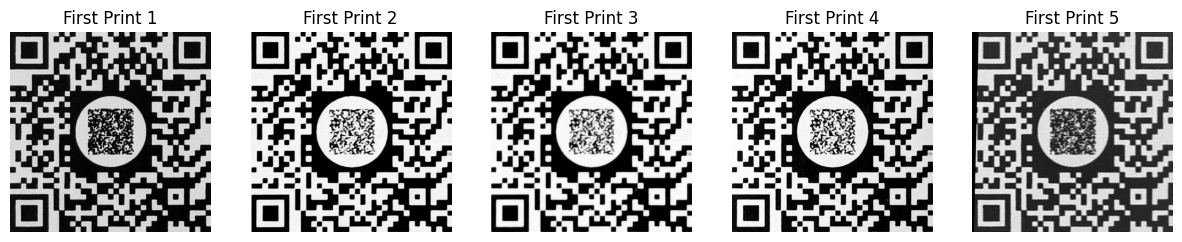

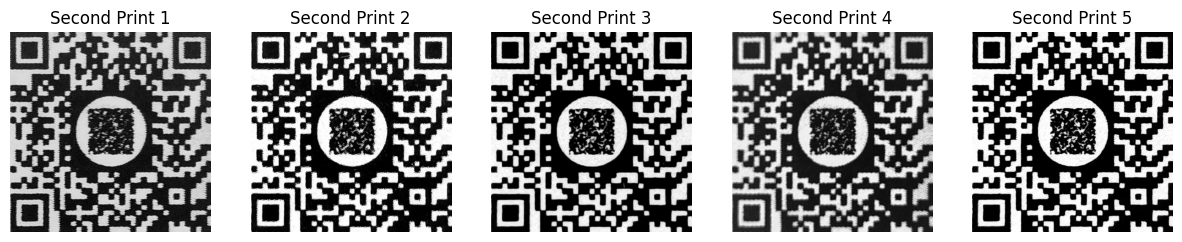

In [29]:
# Display sample images from each class
display_images(first_prints, "First Print")
display_images(second_prints, "Second Print")

In [30]:
# Extract basic image statistics
def extract_image_stats(image_paths):
    sizes = []
    mean_intensities = []
    
    for img_path in image_paths:
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        sizes.append(img.shape)
        mean_intensities.append(np.mean(img))
    
    return sizes, mean_intensities

In [31]:
# Get statistics for both classes
first_sizes, first_means = extract_image_stats(first_prints)
second_sizes, second_means = extract_image_stats(second_prints)

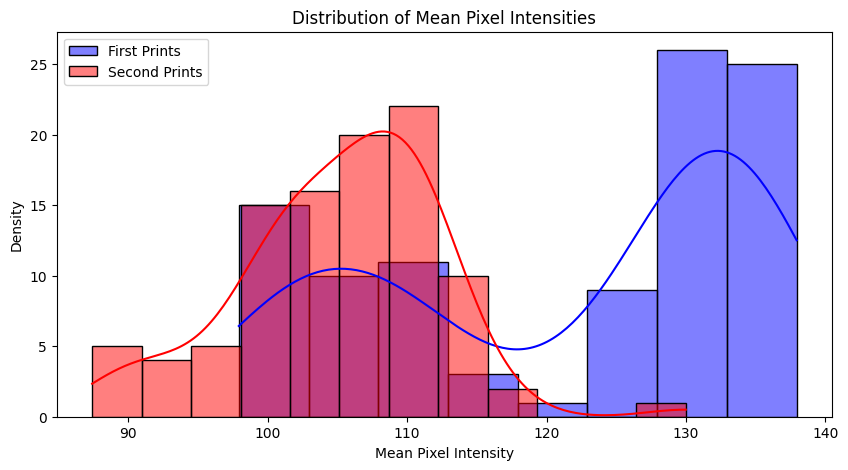

In [32]:
# Plot intensity distributions
plt.figure(figsize=(10, 5))
sns.histplot(first_means, kde=True, label="First Prints", color="blue")
sns.histplot(second_means, kde=True, label="Second Prints", color="red")
plt.legend()
plt.xlabel("Mean Pixel Intensity")
plt.ylabel("Density")
plt.title("Distribution of Mean Pixel Intensities")
plt.show()


In [34]:
# Save statistics to a file
os.makedirs("../results", exist_ok=True)
with open("../results/dataset_statistics.txt", "w") as f:
    f.write(f"Total First Prints: {len(first_prints)}\n")
    f.write(f"Total Second Prints: {len(second_prints)}\n")
    f.write(f"Average Mean Intensity (First Prints): {np.mean(first_means):.2f}\n")
    f.write(f"Average Mean Intensity (Second Prints): {np.mean(second_means):.2f}\n")

print("Dataset statistics saved to results/dataset_statistics.txt")

Dataset statistics saved to results/dataset_statistics.txt
